<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_sdc.png">


<center><h1 style="font-size:2em;color:#2467C0"> Semáforos rojos
 </h1></center>
<br>
<table>
<col width="650">
<col width="350">
<tr>
<td><img src="figuras/semaforos.png" align="middle" style="width:850px;"/></td>
<td>
    
    
**Objetivo:**
    
    
Encontrar la señal roja de los semáforos
    
<br>
</td>
</tr>
</table>

# Cargar librerias

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Definiendo las imagenes

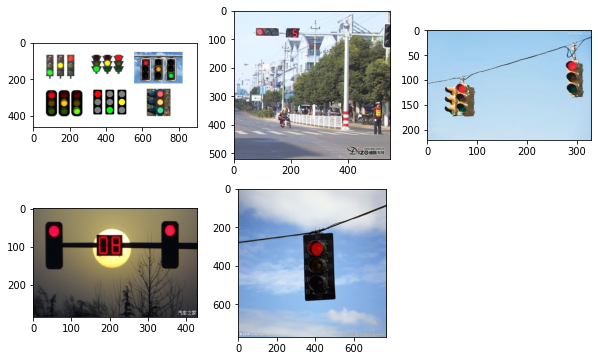

In [4]:
img0 = cv.imread('figuras/semaforo.jpg')
img0 = cv.cvtColor(img0, cv.COLOR_BGR2RGB)

img1 = cv.imread('figuras/semaforo_rojo_1.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread('figuras/semaforo_rojo_2.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

img3 = cv.imread('figuras/semaforo_rojo_3.jpg')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

img4 = cv.imread('figuras/semaforo_rojo_4.jpg')
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

#Imprimiendo las imagenes

plt.figure(figsize=(10,6))

plt.subplot(231)
plt.imshow(img0)

plt.subplot(232)
plt.imshow(img1)

plt.subplot(233)
plt.imshow(img2)

plt.subplot(234)
plt.imshow(img3)

plt.subplot(235)
plt.imshow(img4)

plt.show()

# Definiendo las funciones para encontrar circulos rojos

In [5]:
def hsv_convert(image):#
    return cv.cvtColor(image, cv.COLOR_BGR2HSV)

In [6]:
def red_finder(image):#
    lower_red1 = np.array([0,100,100])
    upper_red1 = np.array([5,255,255])
    lower_red2 = np.array([170,100,100])
    upper_red2 = np.array([180,255,255])
    
    img_hsv = hsv_convert(image)#
    
    mask1 = cv.inRange(img_hsv, lower_red1, upper_red1)
    mask2 = cv.inRange(img_hsv, lower_red2, upper_red2)
    
    mask_red = cv.add(mask1, mask2)
    
    return mask_red

In [67]:
def circle_finder(img):
    print('in circle_finder, circles found')
    red_circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 80, param1=50, param2=10, minRadius=0, maxRadius=90)
    print(red_circles)
    return red_circles

In [121]:
def circle_writer(original_image, name):
    counter = 0
    print('******', name, '******')
    #Encontrar la mascara
    img_red_mask = red_finder(original_image)#
    
    font = cv.FONT_HERSHEY_SIMPLEX
    region = 5
    #Circulos rojos
    red_circles = circle_finder(img_red_mask)

    if red_circles is not None:
        red_circles = np.uint16(np.around(red_circles))
        
        for i in red_circles[0, :]:
            pixel_value = 0.0
            n = 0.0
            
            for j in range(-region, region):
                for k in range(-region, region):
                    pixel_value += img_red_mask[i[1]+j, i[0]+k]
                    n += 1
    
            print("in circle_writer, pixel_value/n:", pixel_value/n)
        
            if pixel_value/n > 240:
                print("in circle_writer red circle found ***********")
                cv.circle(original_image, (i[0], i[1]), i[2]+10, (64,224,208), 2)
                cv.putText(original_image, 'Rojo', (i[0]-i[2], i[1]-i[2]-10), font, 1, (0, 0, 255), 2, cv.LINE_AA)
                counter += 1
    print('in circle_writer, total circles', counter, '++++')
    

In [122]:
def ratio_resize(image, ratio):
    alto=image.shape[0]
    ancho=image.shape[1]
    return cv.resize(image,(int(ancho*ratio),int(alto*ratio)), interpolation=cv.INTER_NEAREST)

# Prueba con funciones

In [123]:
#Definiendo imagenes
img0 = cv.imread('figuras/semaforo.jpg')
img1 = cv.imread('figuras/semaforo_rojo_1.jpg')
img2 = cv.imread('figuras/semaforo_rojo_2.jpg')
img3 = cv.imread('figuras/semaforo_rojo_3.jpg')
img4 = cv.imread('figuras/semaforo_rojo_4.jpg')
img5 = cv.imread('figuras/semaforo_rojo_5.jpg')
img6 = cv.imread('figuras/semaforo_rojo_6.jpg')
img7 = cv.imread('figuras/semaforo_rojo_7.jpg')
img8 = cv.imread('figuras/semaforo_rojo_8.jpg')
img9 = cv.imread('figuras/semaforo_rojo_9.jpg')


In [124]:
#Encontrando y dibujando circulos para cada imagen
circle_writer(img0, 'img0')
circle_writer(img1, 'img1')
circle_writer(img2, 'img2')
circle_writer(img3, 'img3')
circle_writer(img4, 'img4')
circle_writer(img5, 'img5')
circle_writer(img6, 'img6')
circle_writer(img7, 'img7')
circle_writer(img8, 'img8')
circle_writer(img9, 'img9')


****** img0 ******
in circle_finder, circles found
[[[466.5  79.5  16.1]
  [353.5 279.5  17.4]
  [100.5 285.5  18. ]
  [205.5  83.5  17.2]
  [694.5 280.5  17.4]
  [616.5 109.5  13. ]]]
in circle_writer, pixel_value/n: 255.0
in circle_writer red circle found ***********
in circle_writer, pixel_value/n: 255.0
in circle_writer red circle found ***********
in circle_writer, pixel_value/n: 255.0
in circle_writer red circle found ***********
in circle_writer, pixel_value/n: 255.0
in circle_writer red circle found ***********
in circle_writer, pixel_value/n: 255.0
in circle_writer red circle found ***********
in circle_writer, pixel_value/n: 255.0
in circle_writer red circle found ***********
in circle_writer, total circles 6 ++++
****** img1 ******
in circle_finder, circles found
[[[ 90.5  74.5  11.8]
  [215.5  85.5   8.4]
  [502.5 352.5  16.9]
  [386.5 358.5   4.6]]]
in circle_writer, pixel_value/n: 255.0
in circle_writer red circle found ***********
in circle_writer, pixel_value/n: 232.05


In [125]:
img0 = cv.cvtColor(img0, cv.COLOR_BGR2RGB)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
img6 = cv.cvtColor(img6, cv.COLOR_BGR2RGB)
img7 = cv.cvtColor(img7, cv.COLOR_BGR2RGB)
img8 = cv.cvtColor(img8, cv.COLOR_BGR2RGB)
img9 = cv.cvtColor(img9, cv.COLOR_BGR2RGB)


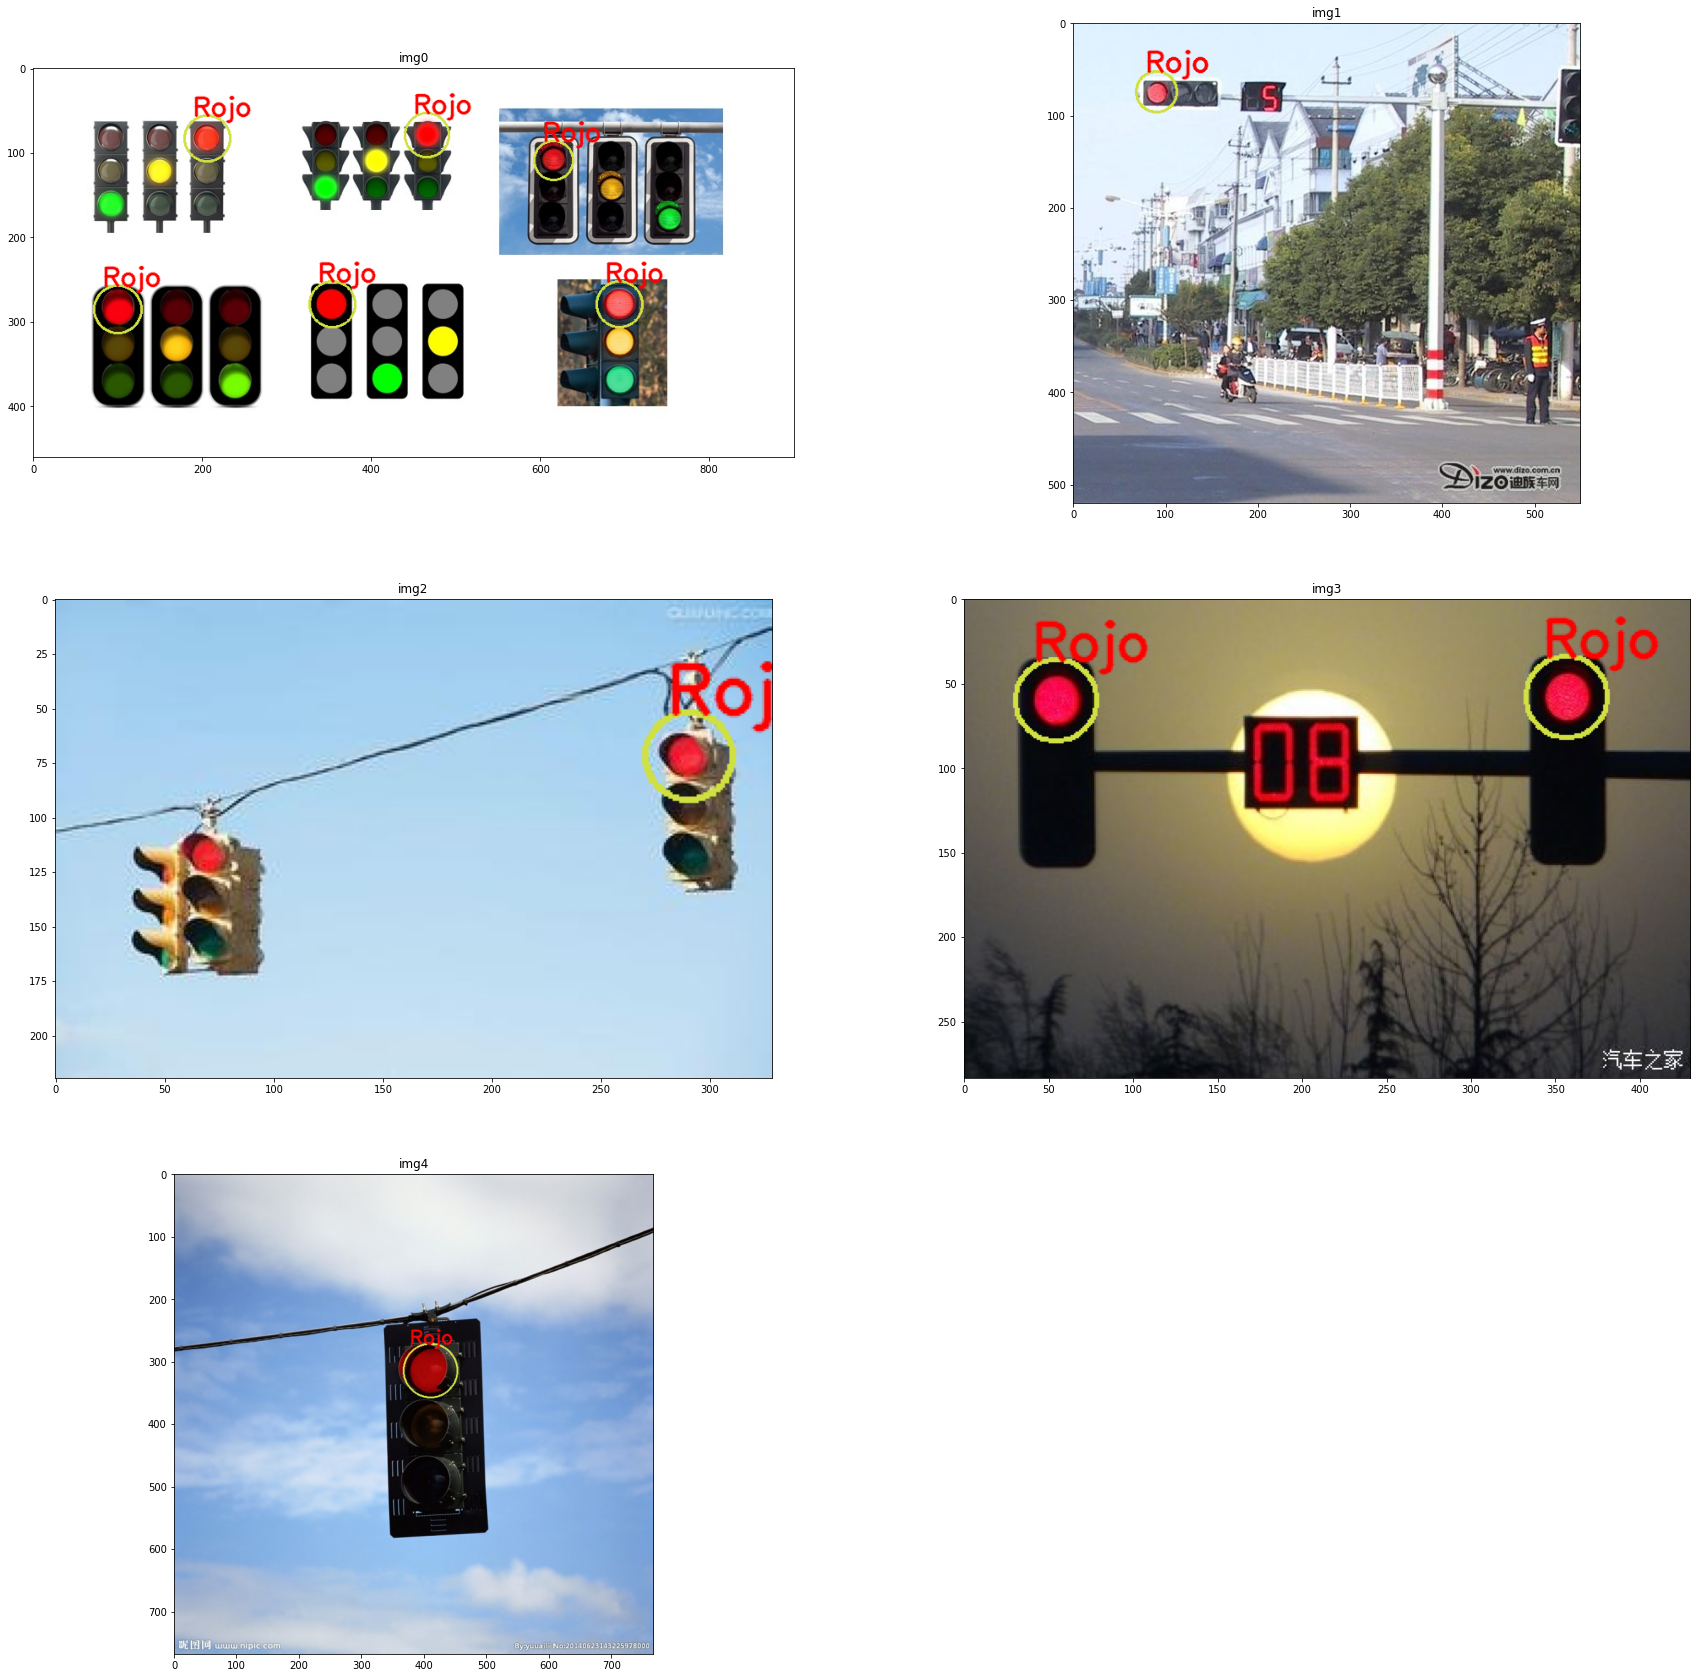

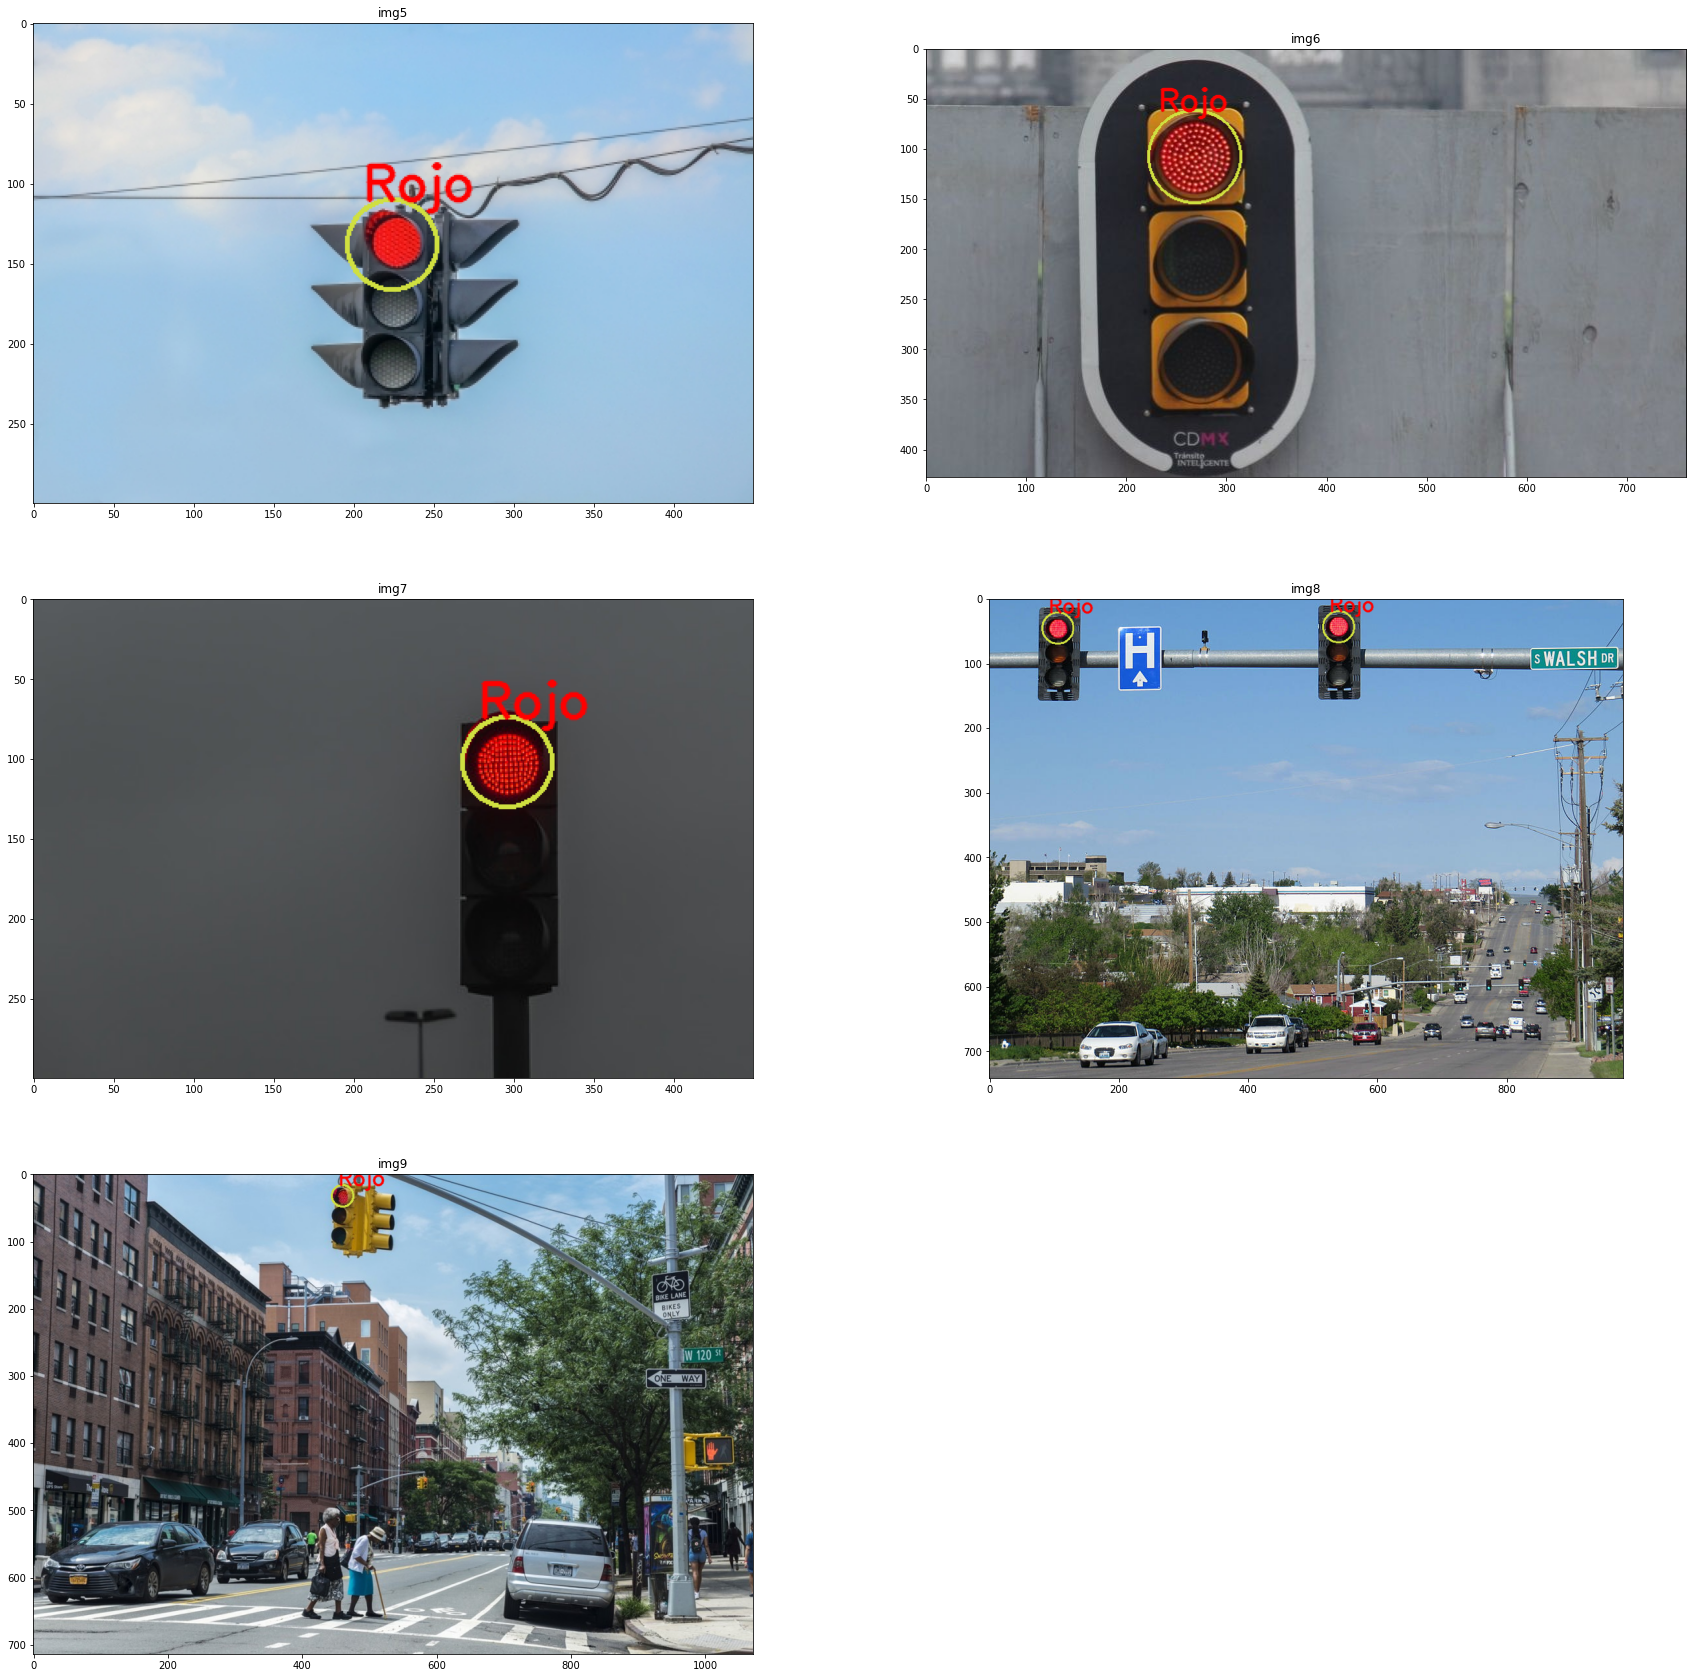

In [126]:
plt.figure(figsize=(30, 30))

plt.subplot(321)
plt.imshow(img0)
plt.title("img0")


plt.subplot(322)
plt.imshow(img1)
plt.title("img1")


plt.subplot(323)
plt.imshow(img2)
plt.title("img2")


plt.subplot(324)
plt.imshow(img3)
plt.title("img3")


plt.subplot(325)
plt.imshow(img4)
plt.title("img4")


plt.show()

plt.figure(figsize=(30, 30))

plt.subplot(321)
plt.imshow(img5)
plt.title("img5")


plt.subplot(322)
plt.imshow(img6)
plt.title("img6")


plt.subplot(323)
plt.imshow(img7)
plt.title("img7")


plt.subplot(324)
plt.imshow(img8)
plt.title("img8")


plt.subplot(325)
plt.imshow(img9)
plt.title("img9")


plt.show()

# Prueba sin funciones

In [ ]:
img0 = cv.imread('figuras/semaforo.jpg')
img0_red_mask = red_finder(img0)

img1 = cv.imread('figuras/semaforo_rojo_1.jpg')
img1_red_mask = red_finder(img1)

img2 = cv.imread('figuras/semaforo_rojo_2.jpg')
img2_red_mask = red_finder(img2)

img3 = cv.imread('figuras/semaforo_rojo_3.jpg')
img3_red_mask = red_finder(img3)

img4 = cv.imread('figuras/semaforo_rojo_4.jpg')
img4_red_mask = red_finder(img4)

#Imprimiendo las imagenes

plt.figure(figsize=(10,6))

plt.subplot(231)
plt.imshow(img0_red_mask, cmap='gray')

plt.subplot(232)
plt.imshow(img1_red_mask, cmap='gray')

plt.subplot(233)
plt.imshow(img2_red_mask, cmap='gray')

plt.subplot(234)
plt.imshow(img3_red_mask, cmap='gray')

plt.subplot(235)
plt.imshow(img4_red_mask, cmap='gray')

plt.show()

In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX
region = 5

red_circles = circle_finder(img3_red_mask)

if red_circles is not None:
    red_circles = np.uint16(np.around(red_circles))
    for i in red_circles[0, :]:
        pixel_value = 0.0
        n = 0.0
        for j in range(-region, region):
            for k in range(-region, region):
                pixel_value += img3_red_mask[i[1]+j, i[0]+k]
                n += 1

        print("pixel_value/n",pixel_value/n)
        if pixel_value/n > 50:
            cv.circle(img3, (i[0], i[1]), i[2]+10, (0, 0, 255), 2)
            cv.putText(img3, 'Rojo', (i[0]-i[2], i[1]-i[2]-10), font, 1, (0,0,255), 2, cv.LINE_AA)

In [ ]:
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.figure(figsize=(13,8))
plt.imshow(img3)
plt.show()